# FPGheArt - Week 2 exercise

### Lorenzo Buriola - 2021860
### Filippo Conforto - 2021856
### Lorenzo Domenichetti - 2011653




In [117]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD 
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import keras

import time

### Data (strings) and splitting

In [3]:
fname="DATA/sequences16.csv"
sx, sy = np.loadtxt(fname,delimiter=',',
                   usecols= (0,1), unpack=True, dtype = str)

In [4]:
N = len(sy)
print(N)
Ls = len(sx[0])
print(Ls)

print(sx[0], sy[0])
perc_train = 0.8
N_train = int(N*perc_train)
N_test = N -N_train
print(f'\ndata:{N}\ntrain: {N_train}\ntest: {N_test}')

3000
16
AAGGTCTGCCGGCCGA 1

data:3000
train: 2400
test: 600


In [5]:
Q = ['A', 'C', 'G', 'T']
Nc=4
onehc = {Q[i]: i for i in range(Nc)}
print(onehc)

{'A': 0, 'C': 1, 'G': 2, 'T': 3}


### Data conversion

In [6]:
y = sy.astype(int)

L = Ls*Nc
print(L)

x= np.zeros((N,L))
print(x[0])

for n in range(N):
    for i in range(Ls):
        x[n][i*4 + onehc[sx[n][i]]] = 1
print(sx[0])
print(x[0])

64
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
AAGGTCTGCCGGCCGA
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]


### Split train/test - validation

In [7]:
(x_train, y_train) = (x[:N_train], y[:N_train])
(x_test, y_test) = (x[N_train:], y[N_train:])
print(y_train.sum() / N_train)
print(y_test.sum() / N_test)

0.24333333333333335
0.25833333333333336


### Definition of model in Keras

In [11]:
np.random.seed(123)

model = Sequential()

model.add(Dense(L,input_shape=(L,),activation = "relu"))
model.add(Dense(L/2,activation = "relu"))
model.add(Dense(L/4,activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics= ["accuracy"])

In [21]:
fit = model.fit(x_train, y_train,
                epochs=30, batch_size = 50, validation_data = (x_test,y_test), shuffle = True,)


Epoch 1/30
48/48 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.9920 - val_accuracy: 0.7900
Epoch 2/30
48/48 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 0.9996 - val_loss: 1.0040 - val_accuracy: 0.7967
Epoch 3/30
48/48 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 1.0419 - val_accuracy: 0.7867
Epoch 4/30
48/48 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 1.0355 - val_accuracy: 0.8000
Epoch 5/30
48/48 [==============================] - 0s 987us/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 1.0707 - val_accuracy: 0.7917
Epoch 6/30
48/48 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 0.9996 - val_loss: 1.0667 - val_accuracy: 0.7967
Epoch 7/30
48/48 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.0708 - val_accuracy: 0.8017
Epoch 8/30
48/48 [

19/19 [==============================] - 0s 614us/step - loss: 1.2655 - accuracy: 0.7950

Test loss: 1.2655105590820312
Test accuracy: 0.7950000166893005


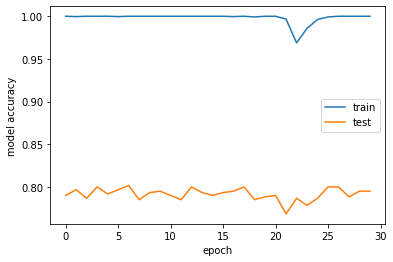

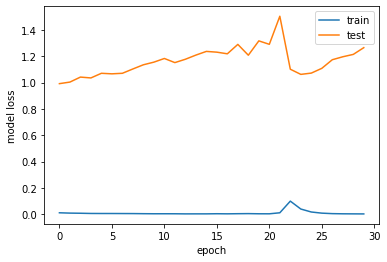

In [28]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Data augmentation

In [90]:
augval = np.asarray([[[sx[0][-i:] + sx[0][:-i],vy] for i in range(16)] for v,vy in zip(sx[:N_train],y[:N_train])]).reshape(38400,2)
augsx = augval[:,0]
augy_train = augval[:,1].astype(int)

In [94]:
augx_train = np.zeros((N_train*16,L))

for n in range(N_train*16):
    for i in range(Ls):
        augx_train[n][i*4 + onehc[augsx[n][i]]] = 1
aug_N_train = N_train*16


### Split train/test - validation

In [95]:
fit2 = model.fit(augx_train, augy_train,
                epochs=30, batch_size = 50, validation_data = (x_test,y_test), shuffle = True,)


Epoch 1/30
768/768 [==============================] - 0s 593us/step - loss: 0.6000 - accuracy: 0.7527 - val_loss: 0.5168 - val_accuracy: 0.7467
Epoch 2/30
768/768 [==============================] - 0s 570us/step - loss: 0.5615 - accuracy: 0.7567 - val_loss: 0.4865 - val_accuracy: 0.7483
Epoch 3/30
768/768 [==============================] - 0s 565us/step - loss: 0.5594 - accuracy: 0.7567 - val_loss: 0.4933 - val_accuracy: 0.7533
Epoch 4/30
768/768 [==============================] - 0s 562us/step - loss: 0.5581 - accuracy: 0.7567 - val_loss: 0.5020 - val_accuracy: 0.7500
Epoch 5/30
768/768 [==============================] - 0s 573us/step - loss: 0.5563 - accuracy: 0.7567 - val_loss: 0.5018 - val_accuracy: 0.7567
Epoch 6/30
768/768 [==============================] - 0s 575us/step - loss: 0.5563 - accuracy: 0.7566 - val_loss: 0.5104 - val_accuracy: 0.7533
Epoch 7/30
768/768 [==============================] - 0s 580us/step - loss: 0.5559 - accuracy: 0.7567 - val_loss: 0.5145 - val_accuracy:

19/19 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.7417

Test loss: 0.5651829242706299
Test accuracy: 0.7416666746139526


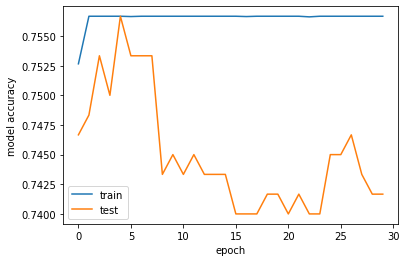

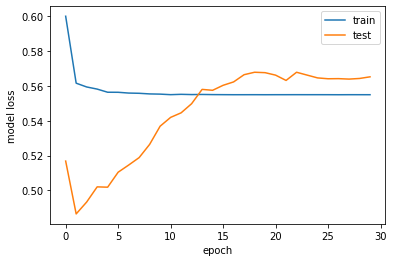

In [96]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(fit2.history['accuracy'])
plt.plot(fit2.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(fit2.history['loss'])
plt.plot(fit2.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## GridSearch

In [121]:
def create_DNN(activation, dropout_rate):
    model = Sequential()

    model.add(Dense(L,input_shape=(L,),activation = activation))
    model.add(Dense(L/2,activation = activation))
    model.add(Dense(L/4,activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation="sigmoid"))
    return model


In [122]:
def compile_model(optimizer=keras.optimizers.Adam(), activation = "relu", dropout_rate = 0.2):
    # create the mode
    model=create_DNN(activation, dropout_rate)
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model


In [126]:
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn = compile_model)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# define parameter dictionary
param_grid = dict(optimizer=optimizer, activation = activation, dropout_rate=dropout_rate)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train, epochs=30, batch_size = 50, shuffle = True)


Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30


/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/filippo/Python38/lib

Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30


/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/filippo/Python38/lib

Epoch 1/30
Epoch 1/30
Epoch 1/30


/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/filippo/Python38/lib

Epoch 1/30
Epoch 1/30
Epoch 1/30


/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/filippo/Python38/lib

Epoch 1/30
Epoch 1/30
Epoch 1/30


/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/filippo/Python38/lib

Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30


/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/filippo/Python38/lib

Epoch 1/30
Epoch 1/30
Epoch 1/30


/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/filippo/Python38/lib

Epoch 1/30
Epoch 1/30
Epoch 1/30


/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/filippo/Python38/lib

Epoch 1/30
Epoch 1/30
Epoch 1/30


/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/filippo/Python38/lib

Epoch 1/30
Epoch 1/30
Epoch 1/30


/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/filippo/Python38/lib

Epoch 1/30
Epoch 1/30
Epoch 1/30


/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/filippo/Python38/lib

Epoch 1/30
Epoch 1/30
Epoch 1/30


/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/filippo/Python38/lib

Epoch 1/30
Epoch 1/30
Epoch 1/30


/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/filippo/Python38/lib

Epoch 1/30
Epoch 1/30
Epoch 1/30


/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/filippo/Python38/lib

Epoch 1/30
Epoch 1/30
Epoch 1/30


/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/filippo/Python38/lib

Epoch 1/30
Epoch 1/30
Epoch 1/30


/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/filippo/Python38/lib

Epoch 1/30
Epoch 1/30
Epoch 1/30


/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/filippo/Python38/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/wrappers/scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/filippo/Python38/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/filippo/Python38/lib

KeyboardInterrupt: 

In [105]:
param_grid

{'optimizer': ['SGD',
  'RMSprop',
  'Adagrad',
  'Adadelta',
  'Adam',
  'Adamax',
  'Nadam'],
 'activation': ['softmax',
  'softplus',
  'softsign',
  'relu',
  'tanh',
  'sigmoid',
  'hard_sigmoid',
  'linear'],
 'dropout_rate': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}